# Churn Modelling
## Attempting to develop a churn model for a TELECOMM company
### Selected a Data Set from Kaggle
### Expected to run this model against real data eventually

In [1]:
#imports 

#import libraries
import pandas as pd
import numpy as np
import matplotlib as mplot
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import pylab as pl

#import other functions
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#import estimators
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

#cross validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

#Sqrt
from math import sqrt

In [38]:
sns.set(color_codes=True)
tips = sns.load_dataset("tips")
sns.set_palette("bright")

## Read and verify data set
### Data Set retrieved from Kaggle 
### Copied on local HDD

In [4]:
#data
rawData = pd.read_csv(r'C:\Users\maavila\Documents\CURSO-BigData-DD\Module V\Task IV\TELCO-Customer-Churn.csv', header =0)
rawData.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Let´s see the size of our data 

In [6]:
rawData.shape

(7043, 21)

### 7043 rows
### 21 columns with 19 attributes

In [10]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [46]:
rawData['SeniorCitizen'] = rawData['SeniorCitizen'].astype('float')

In [47]:
rawData['SeniorCitizen'] = rawData['SeniorCitizen'].astype('int')

### When I tried to convert TotalCharges to float with the following code:
### rawData['TotalCharges'] = rawData['TotalCharges'].astype('float')
### I received an error message
### And this is what I found online "That error is caused by calling float() on a value that cannot be converted to a float.
### If you look closely at the error message, it should display the bad value, i.e. something like ValueError: could not convert string to float: apple.
### If it just ends with float:, that means the input was blank. – John Gordon" 

In [23]:
# Had to replace the empty strings with zero
rawData['TotalCharges'] = rawData['TotalCharges'].replace(" ", 0).astype('float')

In [24]:
rawData.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


In [25]:
# Identify NAs in the data
rawData.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [16]:
x = rawData.describe ()
x.to_excel(r'C:\Users\maavila\Documents\CURSO-BigData-DD\Module V\Task IV\Churn.xlsx', engine='xlsxwriter')  

In [27]:
rawData ["MultipleLines"].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [28]:
rawData ["Contract"].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [29]:
rawData ["PaymentMethod"].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

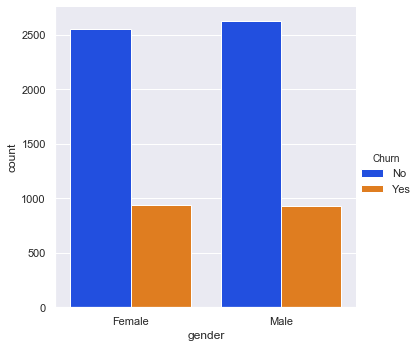

In [39]:
sns.catplot("gender",hue="Churn",kind="count",data=rawData)

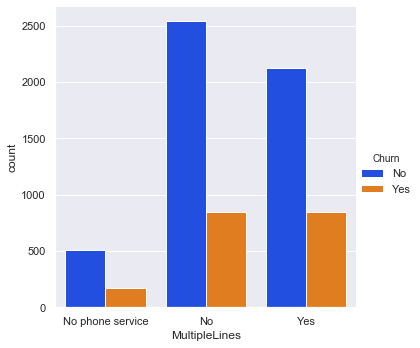

In [40]:
sns.catplot("MultipleLines",hue="Churn",kind="count",data=rawData)

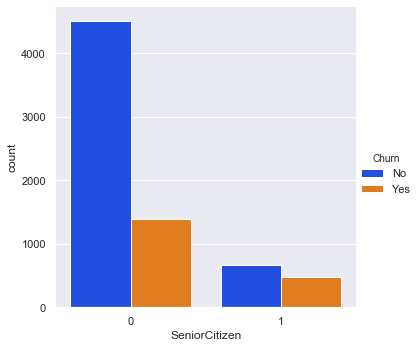

In [48]:
sns.catplot("SeniorCitizen",hue="Churn",kind="count",data=rawData)

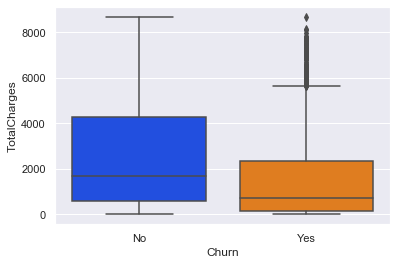

In [50]:
# The following plot substantiates one of the possible hypothesis, that clients who spend more are less likely to leave
sns.boxplot(x="Churn", y="TotalCharges", data=rawData)

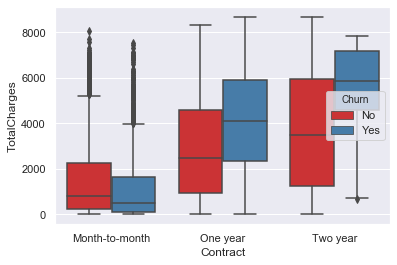

In [54]:
sns.boxplot(x="Contract", y="TotalCharges", hue="Churn", data=rawData, palette="Set1")  

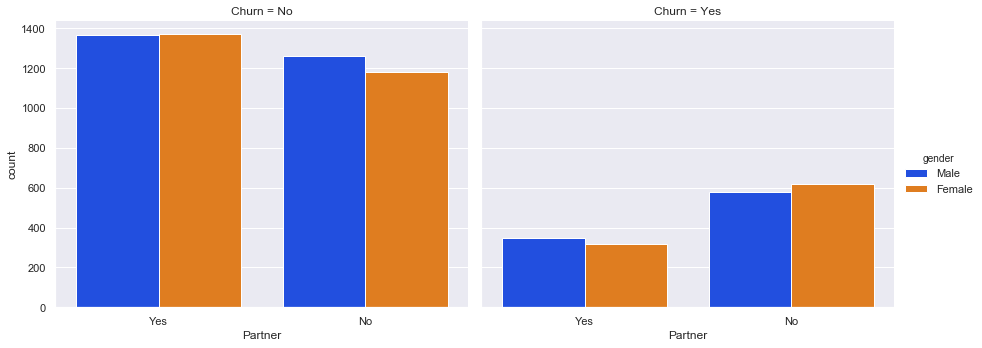

In [57]:
#split by churn or not 
sns.catplot('Partner', data=rawData, kind='count', hue='gender', col='Churn',  
               hue_order=["Male","Female"], aspect=1.25, height=5, palette="bright")